# 卷积神经网络

## padding, strides的作用

In [1]:
from mxnet import nd
from mxnet.gluon import nn

C:\Users\Hikaru\Anaconda2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


先定义一个X作为卷积层的输入，X为一个高宽为的(5,5)的矩阵。

In [2]:
X = nd.random.uniform(shape=(5,5))
X


[[0.5488135  0.5928446  0.71518934 0.84426576 0.60276335]
 [0.8579456  0.5448832  0.8472517  0.4236548  0.6235637 ]
 [0.6458941  0.3843817  0.4375872  0.2975346  0.891773  ]
 [0.05671298 0.96366274 0.2726563  0.3834415  0.47766513]
 [0.79172504 0.8121687  0.5288949  0.47997716 0.56804454]]
<NDArray 5x5 @cpu(0)>

这个X可以认为是只有一个通道且只有一个样本的数据，所以要先把它转换成卷积层能够运算的维度

In [3]:
X = X.reshape((1,1,) + X.shape)
X


[[[[0.5488135  0.5928446  0.71518934 0.84426576 0.60276335]
   [0.8579456  0.5448832  0.8472517  0.4236548  0.6235637 ]
   [0.6458941  0.3843817  0.4375872  0.2975346  0.891773  ]
   [0.05671298 0.96366274 0.2726563  0.3834415  0.47766513]
   [0.79172504 0.8121687  0.5288949  0.47997716 0.56804454]]]]
<NDArray 1x1x5x5 @cpu(0)>

定义一个二维的卷积层，channels=1，kernel_size=3(卷积核高宽为3\*3)，padding=0，strides=1：

In [4]:
conv_layer = nn.Conv2D(channels=1 , kernel_size=3, padding=0,strides=1)
conv_layer.initialize(force_reinit=True)
conv_layer(X)


[[[[-0.07265629 -0.02996709 -0.05599695]
   [-0.08196221  0.0065964  -0.07164453]
   [-0.05519189 -0.07947221 -0.03134103]]]]
<NDArray 1x1x3x3 @cpu(0)>

卷积层的输出的高宽就变为了3\*3。计算的方式为5-3+1=3

当 kernel_size、padding、strides的值为(a,a)的形式时可以简写为a。在这里默认padding时候是对称地在两端各加入a行或者a列。

In [5]:
conv_layer.params

conv0_ (
  Parameter conv0_weight (shape=(1L, 1L, 3L, 3L), dtype=<type 'numpy.float32'>)
  Parameter conv0_bias (shape=(1L,), dtype=<type 'numpy.float32'>)
)

这个卷积层一共有3\*3+1=10个需要训练的参数。

当channels=1，kernel_size=3，padding=1，strides=1时就会得到跟输入相同高宽的输出，因为 5 - 3 + 2 + 1 = 5

In [6]:
conv_layer = nn.Conv2D(channels=1 , kernel_size=3, padding=1,strides=1)
conv_layer.initialize(force_reinit=True)
conv_layer(X)


[[[[0.07879697 0.13109213 0.10206491 0.12027679 0.01479829]
   [0.14459844 0.18046197 0.18126246 0.18797696 0.10550467]
   [0.16965365 0.12954047 0.19445038 0.1672945  0.1147798 ]
   [0.14026433 0.20511073 0.115531   0.16248739 0.10643023]
   [0.1242496  0.10454565 0.08863002 0.08350381 0.05368542]]]]
<NDArray 1x1x5x5 @cpu(0)>

当channels=1，kernel_size=3，padding=1，strides=2时：

In [7]:
conv_layer = nn.Conv2D(channels=1 , kernel_size=3, padding=1,strides=2)
conv_layer.initialize(force_reinit=True)
conv_layer(X)


[[[[ 0.00512447  0.03436728  0.0735539 ]
   [ 0.00474501  0.06926426  0.06970382]
   [-0.02111948  0.05971721  0.04665373]]]]
<NDArray 1x1x3x3 @cpu(0)>

计算方式为(5 - 3 + 2 + 2)/2=3 。这样一来就减小了输入的高宽。我们一半用strides来成倍减少输出的高宽。

卷积核同样可以是高宽不等的矩阵，计算方式是类似的。

假设输入还是X, 请根据形状计算公式计算下面卷积层的输出形状：

In [8]:
nn.Conv2D(channels=1 , kernel_size=(2, 1), padding=(2,3),strides=(2,1))

Conv2D(None -> 1, kernel_size=(2, 1), stride=(2, 1), padding=(2, 3))

## 多通道输入和输出

需要设置输出通道数只需在channels处指定即可。

In [9]:
conv_layer = nn.Conv2D(channels=2 , kernel_size=3, padding=1,strides=2)
conv_layer.initialize(force_reinit=True)
conv_layer(X)


[[[[-0.05216176 -0.04653428  0.02504515]
   [-0.01279594 -0.02271961 -0.01073688]
   [ 0.01790022 -0.01827742  0.00246948]]

  [[-0.08731312 -0.11926781 -0.09274729]
   [ 0.00151717 -0.07124412 -0.08364075]
   [ 0.01050385 -0.04050701 -0.02398763]]]]
<NDArray 1x2x3x3 @cpu(0)>

In [10]:
X1 = nd.random.uniform(shape=(1,2,5,5))
X1


[[[[0.6176355  0.14967486 0.6120957  0.22232139 0.616934  ]
   [0.38648897 0.94374806 0.9025985  0.6818203  0.44994998]
   [0.3595079  0.61306345 0.43703195 0.9023486  0.6976312 ]
   [0.09928035 0.06022547 0.96980906 0.6667667  0.65314   ]
   [0.67063785 0.17090958 0.21038257 0.35815218 0.12892629]]

  [[0.75068617 0.31542835 0.60783064 0.36371076 0.32504722]
   [0.57019675 0.03842543 0.43860152 0.63427407 0.9883738 ]
   [0.95894927 0.10204481 0.6527903  0.20887676 0.6350589 ]
   [0.16130951 0.9952996  0.6531083  0.58185035 0.2532916 ]
   [0.4143686  0.46631077 0.4746975  0.2444256  0.6235101 ]]]]
<NDArray 1x2x5x5 @cpu(0)>

In [11]:
conv_layer = nn.Conv2D(channels=1 , kernel_size=3, padding=1,strides=2)
conv_layer.initialize(force_reinit=True)
conv_layer(X)


[[[[ 0.00712641 -0.0040303   0.03668668]
   [-0.08360508 -0.11144921 -0.00838126]
   [-0.05730859 -0.05394671 -0.00496497]]]]
<NDArray 1x1x3x3 @cpu(0)>

# AlexNet

来搭建一个真正的深度卷积神经网络吧！

这里我们使用了一个公开的的数据集 CIFAR-10。为了计算速度，我只用了100个训练样本和一个测试样本。做计算机视觉类任务时，一般把训练集、验证集和测试集的数据放在不同的文件夹中方便读取。

整理之后一般把一类的文件放在同一个文件夹下面。

In [12]:
import mxnet as mx
from mxnet import autograd
from mxnet import gluon
from mxnet import image
from mxnet import init
from mxnet import nd
from mxnet.gluon.data import vision
import numpy as np
import pandas as pd
from mxnet.gluon import nn
import h5py
import os
import shutil
import matplotlib.pyplot as plt
from mxnet.gluon import data as gdata, loss as gloss

In [13]:
def recog_data(data_dir, label_file, train_dir, test_dir, input_dir, valid_ratio):
    with open(os.path.join(data_dir, label_file), 'r') as f:
        lines = f.readlines()[1:]
        tokens = [l.rstrip().split(',') for l in lines]
        idx_label = dict(((int(idx), label) for idx, label in tokens))
    labels = set(idx_label.values())
    
    n_train_valid = len(os.listdir(os.path.join(data_dir, train_dir)))
    n_train = int(n_train_valid * (1 - valid_ratio))
    assert 0 < n_train < n_train_valid
    n_train_per_label = n_train // len(labels)
    label_count = {}

    def mkdir_if_not_exist(path):
        if not os.path.exists(os.path.join(*path)):
            os.makedirs(os.path.join(*path))

    # 整理训练和验证集。
    for train_file in os.listdir(os.path.join(data_dir, train_dir)):
        idx = int(train_file.split('.')[0])
        label = idx_label[idx]
        mkdir_if_not_exist([data_dir, input_dir, 'train_valid', label])
        shutil.copy(os.path.join(data_dir, train_dir, train_file),
                    os.path.join(data_dir, input_dir, 'train_valid', label))
        if label not in label_count or label_count[label] < n_train_per_label:
            mkdir_if_not_exist([data_dir, input_dir, 'train', label])
            shutil.copy(os.path.join(data_dir, train_dir, train_file),
                        os.path.join(data_dir, input_dir, 'train', label))
            label_count[label] = label_count.get(label, 0) + 1
        else:
            mkdir_if_not_exist([data_dir, input_dir, 'valid', label])
            shutil.copy(os.path.join(data_dir, train_dir, train_file),
                        os.path.join(data_dir, input_dir, 'valid', label))

    # 整理测试集。
    mkdir_if_not_exist([data_dir, input_dir, 'test', 'unknown'])
    for test_file in os.listdir(os.path.join(data_dir, test_dir)):
        shutil.copy(os.path.join(data_dir, test_dir, test_file),
                    os.path.join(data_dir, input_dir, 'test', 'unknown'))

In [14]:
data_dir = "data"
label_file = "trainLabels.csv"
train_dir = 'train_tiny'
test_dir = 'test_tiny'
input_dir = "train_valid_test"
valid_ratio=0.1

In [15]:
recog_data(data_dir, label_file, train_dir, test_dir, input_dir, valid_ratio)

In [16]:
transform_train = gdata.vision.transforms.Compose([
    # 将图片放大成高和宽各为 40 像素的正方形。
    gdata.vision.transforms.Resize(40),
    # 随机对高和宽各为 40 像素的正方形图片裁剪出面积为原图片面积 0.64 到 1 倍之间的小正方
    # 形，再放缩为高和宽各为 32 像素的正方形。
    gdata.vision.transforms.RandomResizedCrop(32, scale=(0.64, 1.0),
                                              ratio=(1.0, 1.0)),
    # 随机左右翻转图片。
    gdata.vision.transforms.RandomFlipLeftRight(),
    # 将图片像素值按比例缩小到 0 和 1 之间，并将数据格式从“高 * 宽 * 通道”改为“通道 * 高 * 宽”。
    gdata.vision.transforms.ToTensor(),
    # 对图片的每个通道做标准化。
    gdata.vision.transforms.Normalize([0.4914, 0.4822, 0.4465],
                                      [0.2023, 0.1994, 0.2010])
])

# 测试时，无需对图像做标准化以外的增强数据处理。
transform_test = gdata.vision.transforms.Compose([
    gdata.vision.transforms.ToTensor(),
    gdata.vision.transforms.Normalize([0.4914, 0.4822, 0.4465],
                                      [0.2023, 0.1994, 0.2010])
])


In [17]:
batch_size = 5
train_ds = gluon.data.vision.ImageFolderDataset(os.path.join(data_dir, input_dir, 'train'), flag=1)
valid_ds = gluon.data.vision.ImageFolderDataset(os.path.join(data_dir, input_dir, 'valid'), flag=1)
train_valid_ds = gluon.data.vision.ImageFolderDataset(os.path.join(data_dir, input_dir, 'train_valid'),
                                           flag=1)
test_ds = gluon.data.vision.ImageFolderDataset(os.path.join(data_dir, input_dir, 'test'), flag=1)

loader = gluon.data.DataLoader
train_data = loader(train_ds.transform_first(transform_train), batch_size, shuffle=True, last_batch='keep')
valid_data = loader(valid_ds.transform_first(transform_test), batch_size, shuffle=True, last_batch='keep')
train_valid_data = loader(train_valid_ds.transform_first(transform_train), batch_size, shuffle=True,
                          last_batch='keep')
test_data = loader(test_ds.transform_first(transform_test), batch_size, shuffle=False, last_batch='keep')

In [18]:
def alexnet():
    net = nn.Sequential()
    net.add(
        nn.Conv2D(96, kernel_size=5, padding=2, strides=2, activation='relu'),
        nn.MaxPool2D(pool_size=3, strides=2),
        nn.Conv2D(256, kernel_size=3, padding=2, activation='relu'),
        nn.MaxPool2D(pool_size=3, strides=2),
        nn.Conv2D(384, kernel_size=3, padding=1, activation='relu'),
        nn.Conv2D(384, kernel_size=3, padding=1, activation='relu'),
        nn.Conv2D(256, kernel_size=3, padding=1, activation='relu'),
        nn.MaxPool2D(pool_size=3, strides=2),
        # 使用比 LeNet 输出大数倍了全连接层。其使用丢弃层来控制复杂度。
        nn.Dense(4096, activation="relu"), nn.Dropout(0.5),
        nn.Dense(4096, activation="relu"), nn.Dropout(0.5),
        # 输出层。我们这里使用 CIFAR-10，所以用 10，而不是论文中的 1000。
        nn.Dense(10)
    )
    return net

In [19]:
lr = 0.01
num_epochs = 5
ctx = mx.gpu()
net = alexnet()
net.initialize(force_reinit=True, ctx = ctx, init = init.Xavier())
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': lr})
loss = gloss.SoftmaxCrossEntropyLoss()

In [20]:
def get_loss(data, net, ctx):
    loss = 0.0
    for feas, label in data:
        label = label.as_in_context(ctx)
        output = net(feas.as_in_context(ctx))
        cross_entropy = softmax_cross_entropy(output, label)
        loss += nd.mean(cross_entropy).asscalar()
    return loss / len(data)

def train(net, train_data, valid_data, num_epochs, lr, wd, ctx):
    trainer = gluon.Trainer(
        net.collect_params(), 'adam', {'learning_rate': lr, 'wd': wd})
    train_loss = []
    if valid_data is not None:
        test_loss = []
    
    for epoch in range(num_epochs):
        _loss = 0.
        for data, label in train_data:
            label = label.as_in_context(ctx)
            with autograd.record():
                output = net(data.as_in_context(ctx))
                loss = softmax_cross_entropy(output, label)
            loss.backward()
            trainer.step(batch_size)
            _loss += nd.mean(loss).asscalar()
        __loss = _loss/len(train_data)
        train_loss.append(__loss)
        
        if valid_data is not None:  
            valid_loss = get_loss(valid_data, net, ctx)
            epoch_str = ("Epoch %d. Train loss: %f, Valid loss %f, "
                         % (epoch,__loss , valid_loss))
            test_loss.append(valid_loss)
        else:
            epoch_str = ("Epoch %d. Train loss: %f, "
                         % (epoch, __loss))
            
        print('lr ' + str(trainer.learning_rate))
        

    plt.plot(train_loss, 'r')
    if valid_data is not None: 
        plt.plot(test_loss, 'g')
    plt.legend(['Train_Loss', 'Test_Loss'], loc=2)



C:\Users\Hikaru\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: UserWarning: All children of this Sequential layer 'sequential0_' are HybridBlocks. Consider using HybridSequential for the best performance.
  after removing the cwd from sys.path.


lr 0.001
lr 0.001
lr 0.001
lr 0.001
lr 0.001


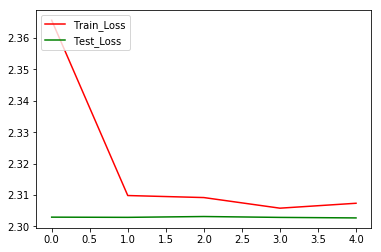

In [21]:
softmax_cross_entropy = gluon.loss.SoftmaxCrossEntropyLoss()
#ctx = mx.gpu()
#net = alexnet()
net.hybridize()

train(net, train_data,valid_data, num_epochs, 0.001, 0.002, ctx)